<center><h1>Tutorial 3 - Analysis at the content items level</h1><center/>

This is the 3rd tutorial notebook, following the 1st and 2nd ones: `Introductory_tutorial_(1)`, `Issues_tutorial_(2)`. Tutorials 2 and 3 are completely independent.<br/>
This tutorial aims to explain you how to use the functions made for analysis **at the content items level**.

Fonctions for analysis at the content items level have been created after those for the analysis at the issues level. It is more modular and allows more types of analysis, depending on what you wish to investigate.

If you do not understand some parts of the notebook, in particular for any part regarding loading datasets, transformation of tables etc, please refer to the first  tutorial notebook 1 : `Introductory_tutorial_(1)`.

---

## Table of Content
[Introduction](#introduction)

[Setup](#setup)

[1. One-dimensional analysis](#1D)
> [1.1 Content items frequency](#1D_freq) <br/>
>> [1.1.1 Example 1: basics - time analysis](#1D_freq_ex1)<br/>
>> [1.1.2 Example 2: log scale - newspapers analysis](#1D_freq_ex2)<br/>
>> [1.1.3 Example 3: sorting - type analysis](#1D_freq_ex3)<br/>
>> [1.1.4 Example 4: filtering - type analysis](#1D_freq_ex4)<br/>
>> [1.1.5 Example 5: access rights](#1D_freq_ex5)

> [1.2 Average title length](#1D_avg) <br/>

[2. Two-Dimensional analysis](#2D)

---

<a id='introduction'></a>
## Introduction

There are 4 main functions that you may use for the content items analysis :
- Analysis of **content items frequency** : `plt_freq_ci`, `plt_freq_ci_filter`
- Analysis of **average title length** : `plt_avg_tl`, `plt_avg_tl_filter`

All 4 functions display a plot, and return a pandas dataframe.

As their name suggests, the two functions that have suffix `_filter` can take filtering parameters (cf. tutorial (1) and eventually tutorial (2)).

Both functions can be used for *one-dimensional* or *two-dimensional* analysis, depending on the parameters you pass them (see below for more details).

---

<a id='setup'></a>
## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Specify path for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

##### Plotting setup
For better rendering, we recommand importing the <a href="https://seaborn.pydata.org/">seaborn python library</a> and using a grid (white or dark, depending on your preference).

In [14]:
import seaborn as sns
sns.set(style="darkgrid")
#sns.set(style="whitegrid")

##### Loading

In [3]:
from impresso_commons.utils.s3 import IMPRESSO_STORAGEOPT
import dask.dataframe as ddf

In [4]:
PATH = '/scratch/students/justine/'
FILE = 's3-impresso-stats'

In [5]:
ci_df = ddf.read_csv(
    PATH+FILE+"/content-item-stats/*",
    storage_options=IMPRESSO_STORAGEOPT
)

##### Add decade columns

In [6]:
from impresso_stats.helpers import decade_from_year_df

In [7]:
ci_df = decade_from_year_df(ci_df, dask_df = True)

##### Add access rights

In [8]:
from impresso_stats.helpers import licenses_ci_df

In [9]:
ci_licences_df = licenses_ci_df(ci_df)

---

<a id='1D'></a>
## 1. One-Dimensional analysis

What do we mean by *one-dimensional* (1D) analysis ? <br/>
We mean analysis aggregated a one level. For example analysing the content items frequency at *one-dimension*, means computing the content items frequency by year, of by newspaper, or by other things, but one at a time only.

In the section we will show you how to use the functions to do 1D analysis, for the content items frequency, and also the average title length.

<a id='1D_freq'></a>
### 1.1 Content items frequency

Let's start with function `plt_freq_ci`, and its derivative `plt_freq_ci_filter`.

You need to pass at least two parameters to the functions : 
- `df`: your dataframe
- `grouping_col`: the features by which you want to aggregate 

The `df` parameter is a dask dataframe, and has do to have at least a column `id` and a column with the same name as `grouping_col`.<br/>
The `grouping_col` parameter should be a list.

#### Aggregation levels
Usgin the dataset we have loaded above (and presented in tutorial (1)), here is the list of parameters you can give to the function for `grouping_col` :
- year
- decade
- newspaper
- type
- licenses

In [36]:
from impresso_stats.visualization import plt_freq_ci, plt_freq_ci_filter

<a id='1D_freq_ex1'></a>
#### 1.1.1 Example 1 : basics (time)
Let's show you a simple use of the function.

The following cell plots the number of content items by year (through the whole dataset).

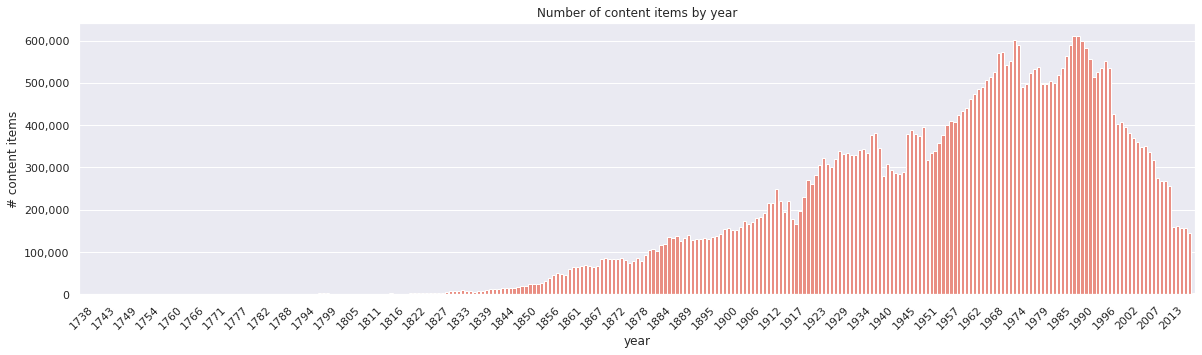

In [15]:
count_year_df = plt_freq_ci(ci_df, ['year'])

##### Explanation
There si not much to say here as the plot is quite understandable from itself. <br/>
If you do not want to display the x axis title "year", you can set the parameter `hide_xtitle` as True (see below).

The following cell plots the number of content items by decade (through the whole dataset), hiding the x axix title.

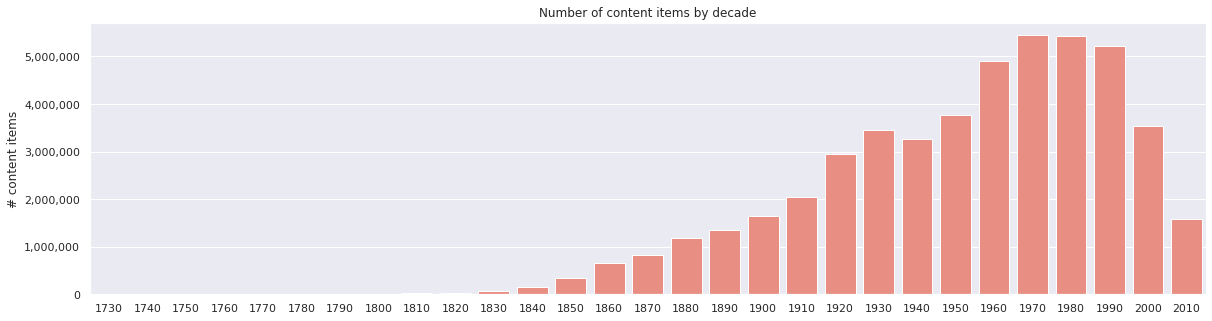

In [18]:
count_decade_df = plt_freq_ci(ci_df, ['decade'], hide_xtitle=True)

<a id='1D_freq_ex2'></a>
#### 1.1.2 Example 2: log scale (newspapers)

You may want to visualize which newspapers have more / less content items than others. <br/>
The following cell plots the number of content items by newspaper.

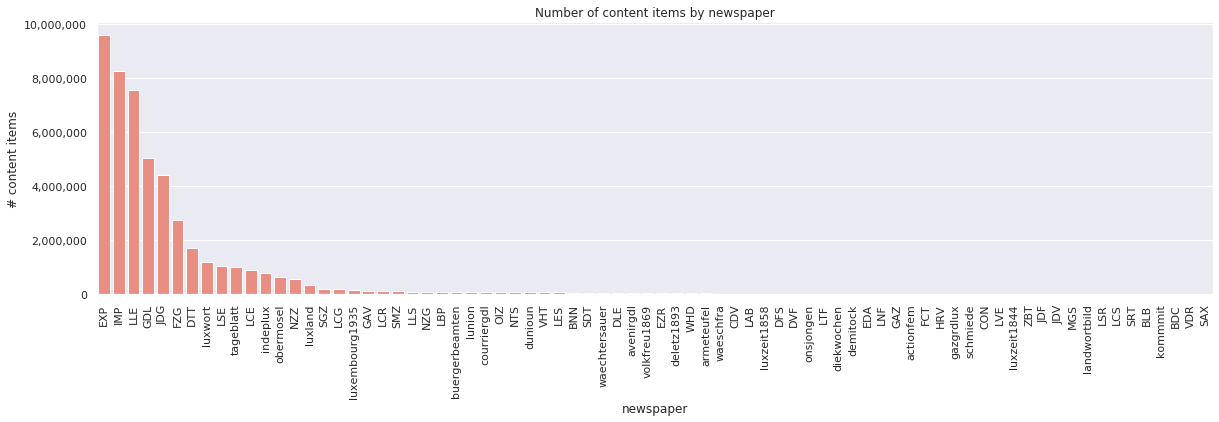

In [19]:
count_np_df = plt_freq_ci(ci_df, ['newspaper'])

##### Explanation
From this plot you can see approximately well the 15 first newspapers. The difference in the number of content item is so large with other newspapers that the plot doesn't render well. <br/>
You may want to plot in log scale.

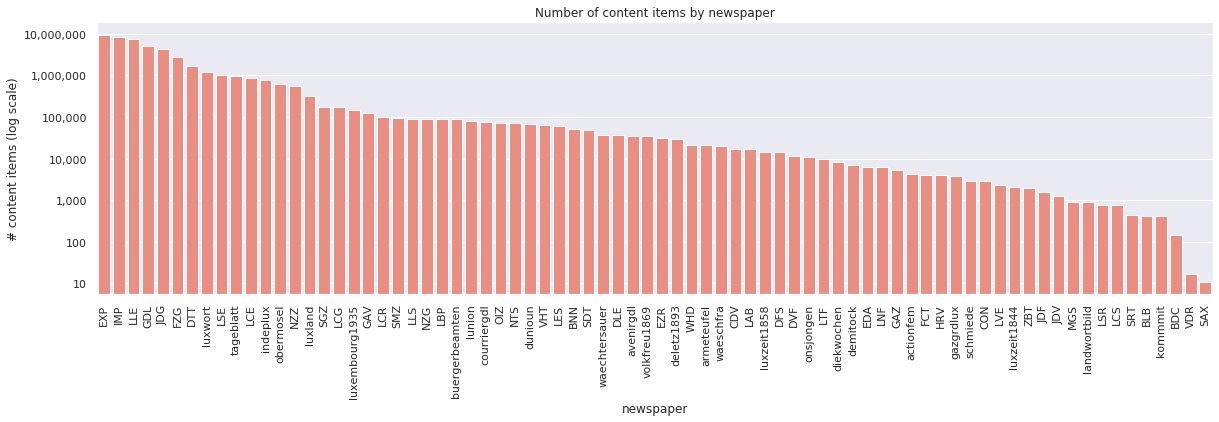

In [20]:
count_np_log_df = plt_freq_ci(ci_df, ['newspaper'], log_y=True)

<a id='1D_freq_ex3'></a>
#### 1.1.3 Example 3: sorting (type)
By default, on the plot the x axis label are ordered in descending order (or chronological if we are using time values). 

If you prefer plotting in acsending, here is how you should do.

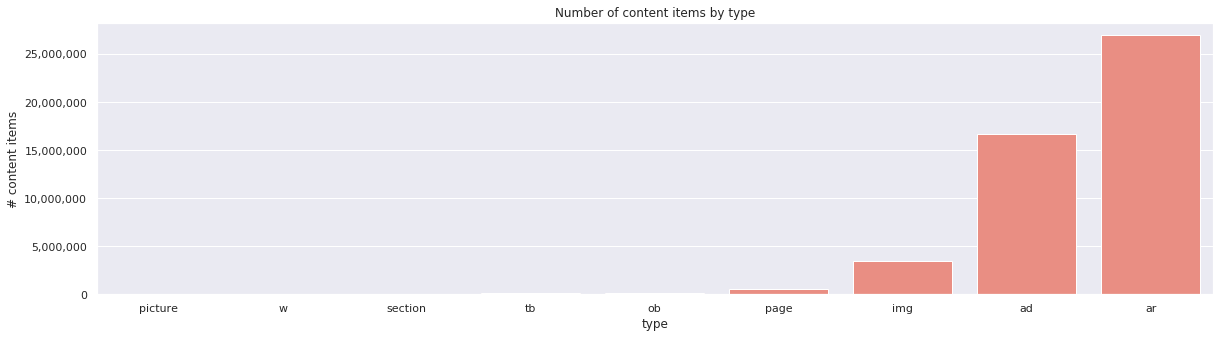

In [26]:
count_type_df = plt_freq_ci(ci_df, ['type'], asc=True)

##### Explanation
You can combine several functionalities. Here as for years above, you may like to plot log scale.

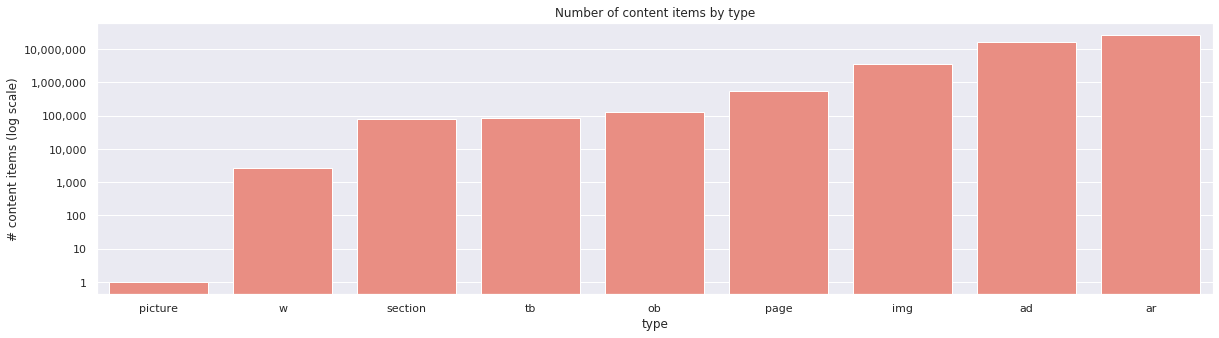

In [27]:
count_type_log_df = plt_freq_ci(ci_df, ['type'], log_y=True, asc=True)

<a id='1D_freq_ex4'></a>
#### 1.1.4 Example 4: filtering 
You can apply filters on the dataframe before computing and plotting the content item frequency. <br/>
For that purpose you should use function `plt_freq_ci_filter`. If you call this function without passing it any parameter, it simply does the same as `plt_freq_ci`.

For more information and examples on filter, see Tutorial 2.

#### Filtering over a period of time
Let's say you would like to know what newspapers have the larger number of content items during the 19th century.

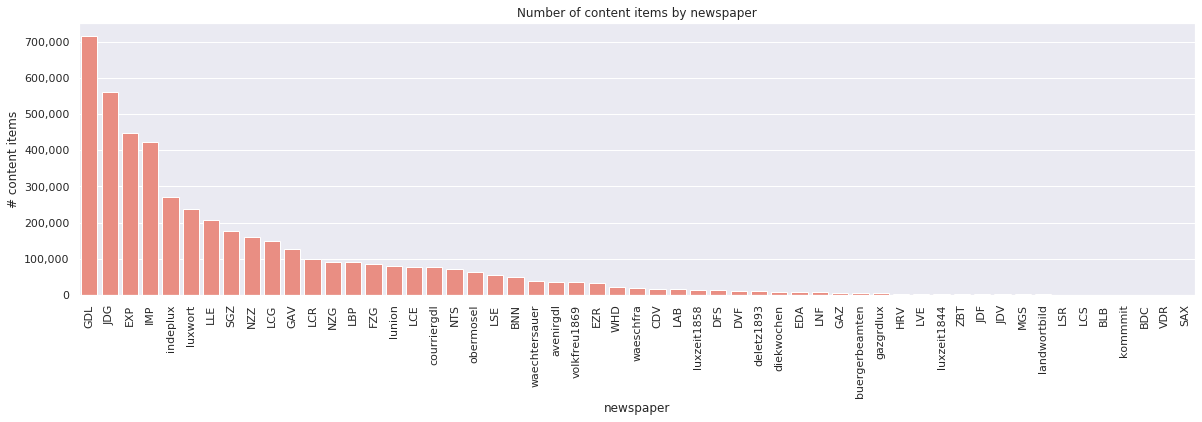

In [29]:
count_np_19th_df = plt_freq_ci_filter(ci_df, ['newspaper'], start_date=1800, end_date=1899)

##### Explanation

You can compare this plot to the one obtained in [1.1.2](#1D_freq_ex2) and see that is quite different: there are less newspapers and they don't appear in the same order. <br/>

*GDL* and *JDG* are the two newspapers that have the larger number of content items un the 19th century, whereas *EXP* which was the largest overall arrives in third place.

#### Filtering for content items

You can filter content items with the same parameters as issues (see Tutorial 2), but you can also **filter them by content item type** (article, image, page, weather, ...). You can specify several types by putting them in sequence.

Let's say you would like to know how many **images** were published in swiss journals, during the 19th century.

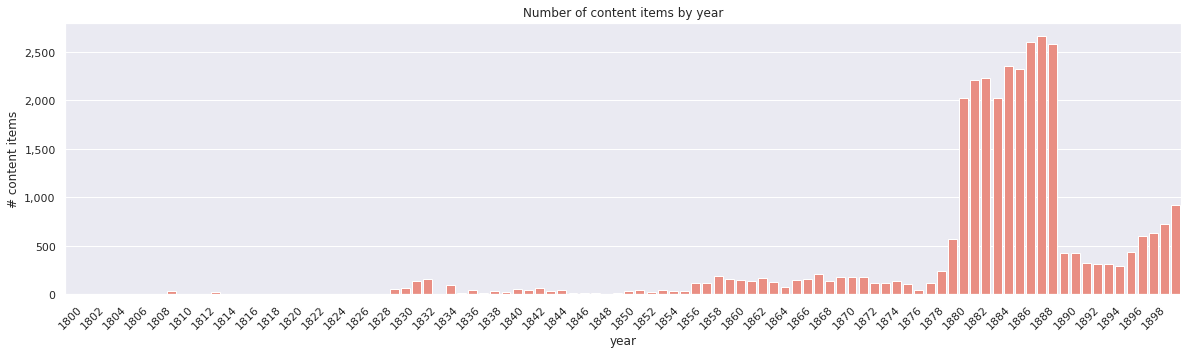

In [33]:
count_year_img_df = plt_freq_ci_filter(ci_df, ['year'], types=['img'], country='CH', start_date=1800, end_date=1899)

You can also combine several types.

<a id='1D_freq_ex5'></a>
#### 1.1.5 Example 5: access rights
If you want to have statistics on the number of content items per access right, you should be careful to use the dataframe `ci_licences_df`, having a column `access_rights` (and not `ci_df`). <br/>
**Note:** Do not forget that this dataframe has less rows than the original one (cf. Tutorial 1).

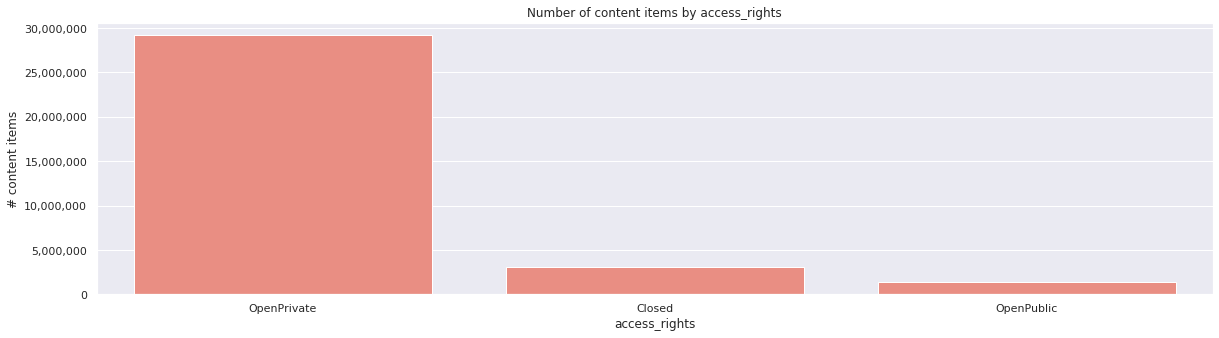

In [45]:
count_licenses_df = plt_freq_ci(ci_licences_df, ['access_rights'])

<a id='1D_avg'></a>
### 1.2 Average title length

The average title length can be computed and plotted using function `plt_avg_tl` and its derivative `plt_avg_tl_filter`. 

This function works exactly the same way as `plt_freq_ci` presented above, so we will only show you one simple example here, and let you explore by yourself. 

The `df` parameter is a dask dataframe, and has to have at least a column `title_length` and a column with the same name as `grouping_col`.<br/>

In [43]:
from impresso_stats.visualization import plt_avg_tl, plt_avg_tl_filter

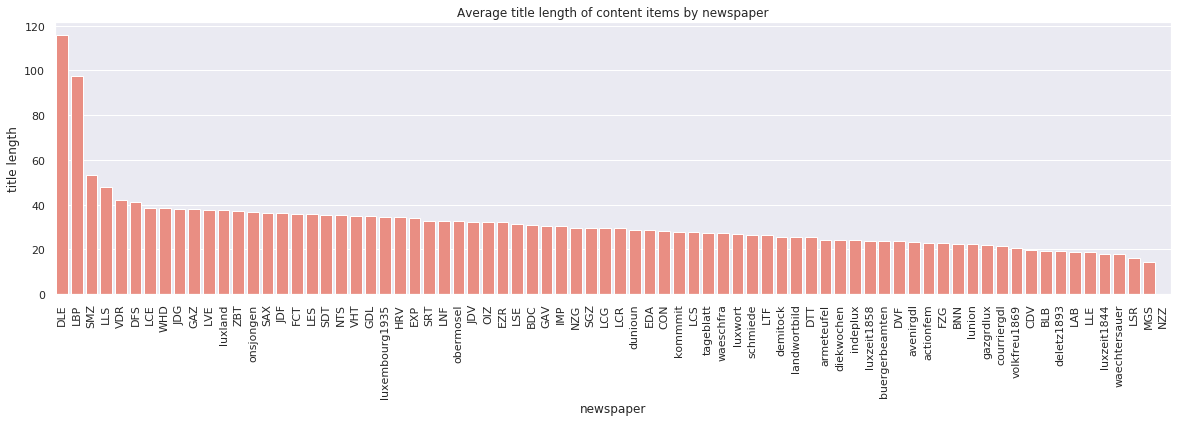

In [44]:
tl_per_np = plt_avg_tl(ci_df, ['newspaper'])

---

<a id='2D'></a>
## 2. Two-Dimensional analysis

In comparision to *one-dimensional* analysis, by *two-dimensional* analysis we mean analysis aggregated a two levels.
For example analysing the content items frequency at *two-dimensions*, means computing the content items frequency by year per newspaper, or by type per access_rights, or by other things, but grouping by two at a time.

When passing a list of length 2 as parameter `grouping_col` to the functions, it will produce a two-dimensional analysis. **The order of the parameters in the list matters !** <br/>
The first one will correspond to the x axis, and the second one to the category (hue on the plot).

***Note:*** *You should not use a time feature (decade of year) as second element of the list. It should always be the label used in x axis and not as a category.*

In the section we will show you how to use the functions to do 2D analysis, for the content items frequency, and also the average title length.

***Note:*** *When plotting in 2D, **filtering becomes necessary** in order to avoid having too much data to plot on a single graph (the limit is set to a total of 350 bars for now - you can change it in the file `visualization.py`). <br/> In particular the second element of the list, used as category, should not have too many values possible (not more than 5/6), and should have less values than the element chosen as first one. <br/>
For example, if you wish to plot the number of content items per newspaper by year, you will need to select some newspapers (we recommend 2 or 3, until 5 maximum), and eventually some year bounds.*

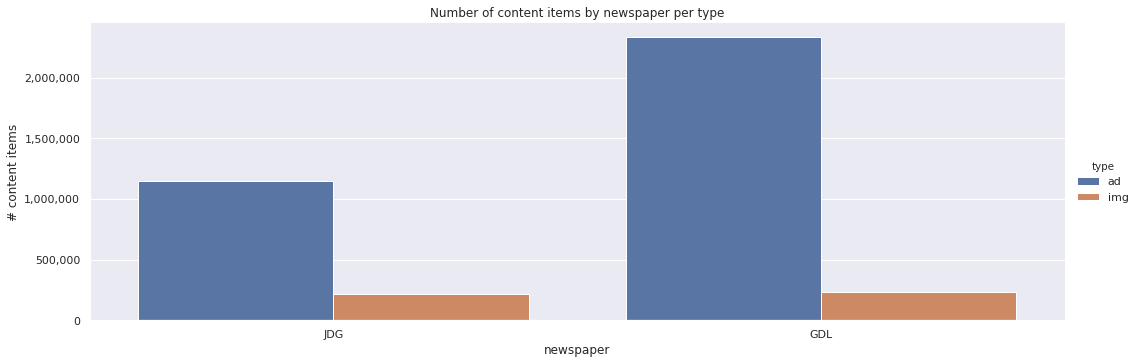

In [58]:
count_type_np_df = plt_freq_ci_filter(ci_df, ['newspaper', 'type'], np_ids=['JDG', 'GDL'], types=['img', 'ad'])

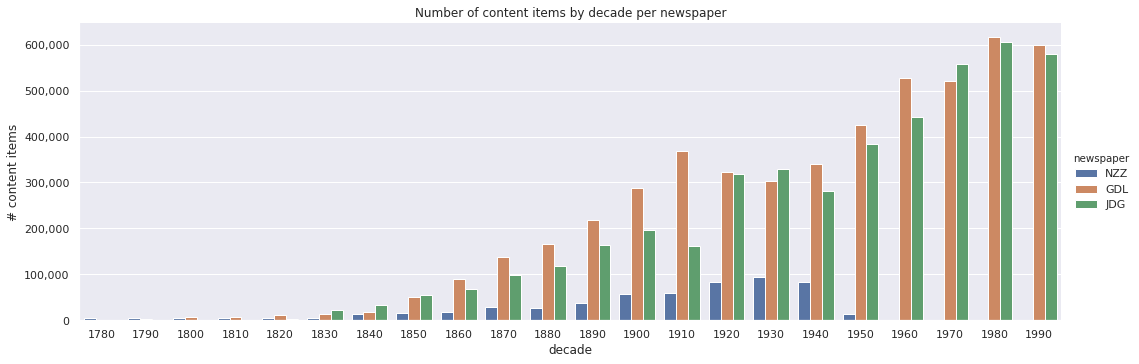

In [47]:
count_decade_np_df = plt_freq_ci_filter(ci_df, ['decade', 'newspaper'], np_ids=['NZZ', 'JDG', 'GDL'])

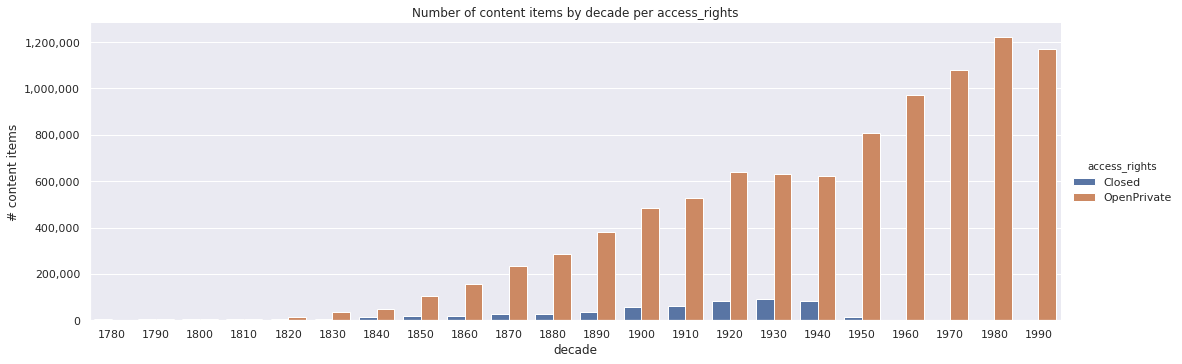

In [48]:
count_decade_licences_df = plt_freq_ci_filter(ci_licences_df, \
                                              ['decade', 'access_rights'], \
                                              np_ids=['NZZ', 'JDG', 'GDL'])

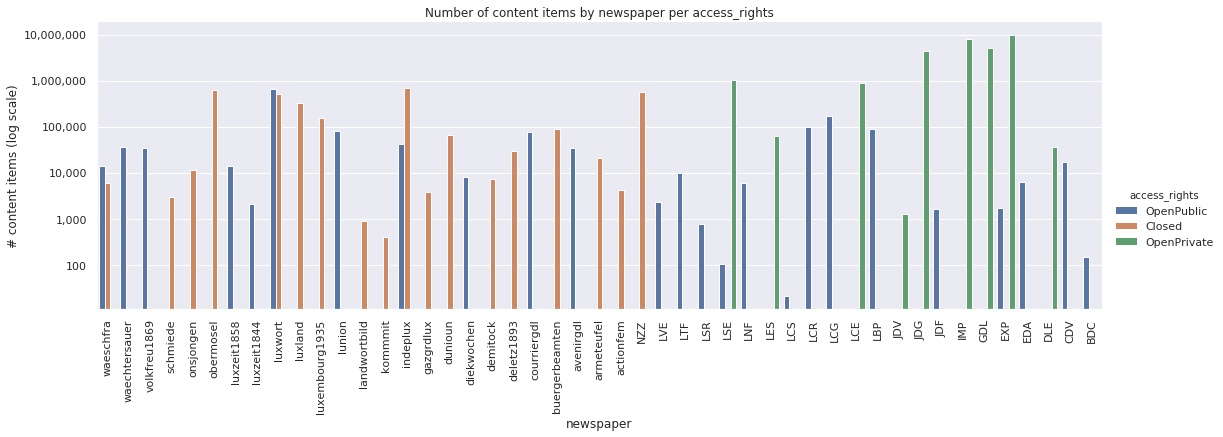

In [49]:
count_np_licences_df = plt_freq_ci_filter(ci_licences_df,['newspaper', 'access_rights'],log_y=True)

---

#### By type of content item

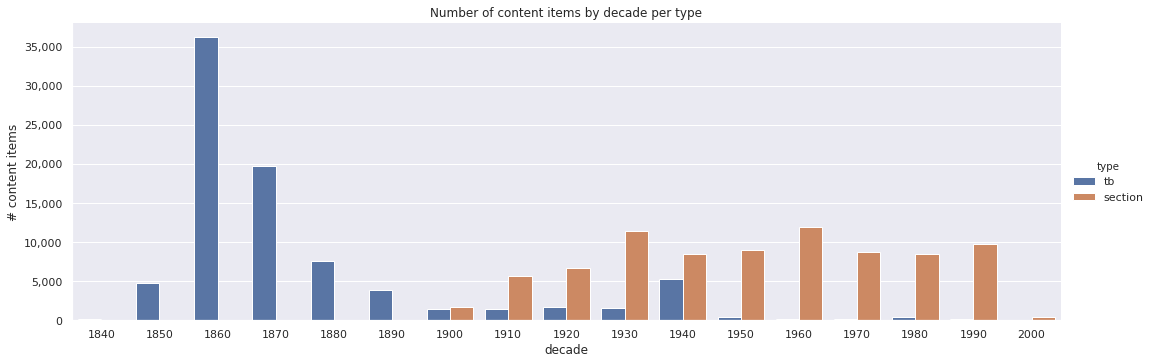

In [50]:
count_decade_type_df = plt_freq_ci_filter(ci_df, ['decade', 'type'], types=['section', 'tb'])

---

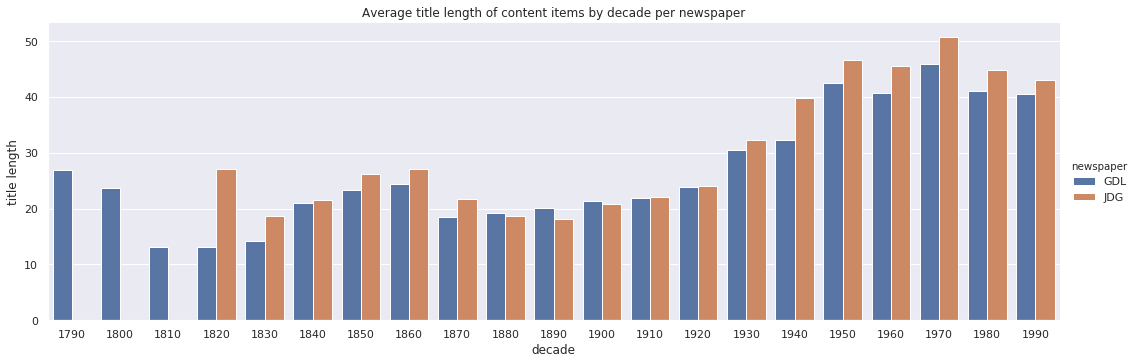

In [55]:
avg_decade_np_df = plt_avg_tl_filter(ci_df, ['decade', 'newspaper'], np_ids=['GDL', 'JDG'])

## 3. Use case

In [ ]:
from impresso_stats

,newspaper,year,freq
0,EXP,1738,9.0
1,EXP,1739,0.0
2,EXP,1740,19.0


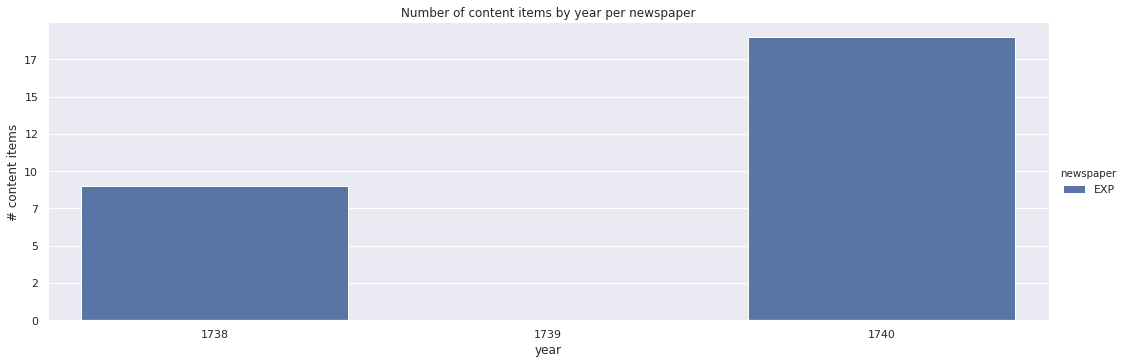

In [40]:
plt_freq_ci_filter(ci_df, ['year', 'newspaper'], start_date=1730, end_date=1740)

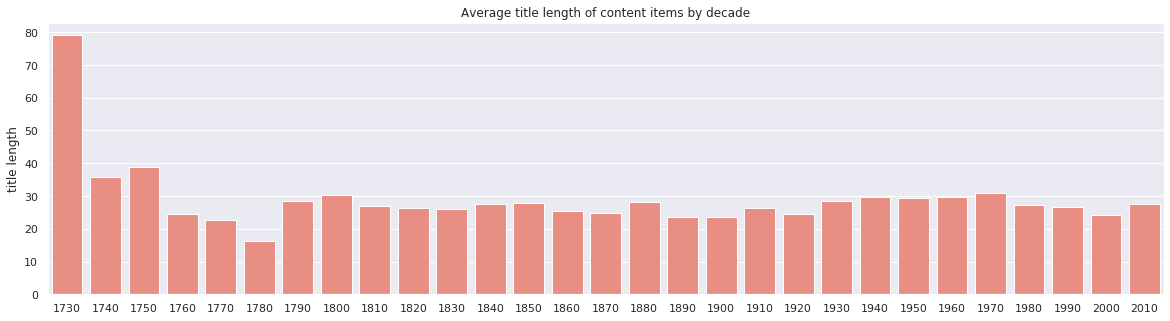

In [51]:
tl_per_decade = plt_avg_tl(ci_df, ['decade'], hide_xtitle=True)

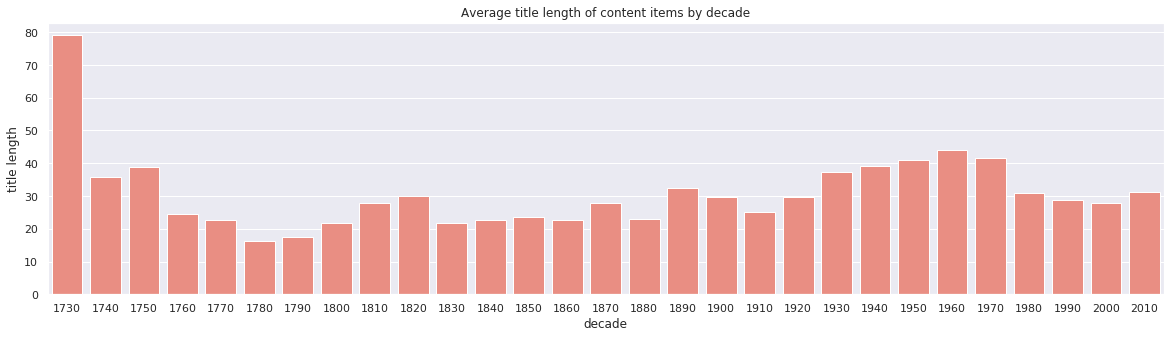

In [52]:
test = plt_avg_tl_filter(ci_df, ['decade'], np_ids=['EXP'])

Function `plt_freq_ci` (and its derivatives) plot a categorical or bar plot and also return the aggregated dataframe, containing a column `ci_count` corresponding to the computed frequency.

If you keep this dataframe in memory, you can call again the function `plt_freq_ci` without needing to aggregate the dataframe again. This speeds up things. 

Note however that the filtering function of done **before** aggregation. Therefore you cannot call `plt_freq_ci_filter` and pass it a dataframe which has already been aggregated. This only works with `plt_freq_ci` and derivatives.

#### Uncomment the cells below if you start directly from here and want to retrieve the stored dataframe 
(You will also need to run the import cells above)

In [11]:
from impresso_stats.visualization import plt_freq_ci, plt_freq_ci_filter

In [19]:
#storage_path = '/scratch/students/justine/'

In [20]:
# Uncomment for saving the dataset computed above
#ci_df.to_parquet(storage_path + 'content-item.parquet')

In [21]:
# Uncomment for loading the stored dataset
#ci_df = ddf.read_parquet(storage_path + 'content-item.parquet')

TO ADD :

In [ ]:
#plt_freq_ci_filter(ci_df, ['year'], np_ids=['JDG'], hide_xtitle=True)